In [1]:
#Importar pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
#Carregar dados
colunas = ['NU_ANO','TP_SEXO','TP_FAIXA_ETARIA','TP_COR_RACA','TP_ESCOLA',
           'NO_MUNICIPIO_PROVA','SG_UF_PROVA','NU_NOTA_CN','NU_NOTA_CH',
           'NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','Q006','Q025']
enem2020 = pd.read_csv('MICRODADOS_ENEM_2020.csv', sep=';', encoding='latin-1', usecols=colunas)

In [3]:
#Renomear colunas da pesquisa socioeconômica
enem2020.rename(columns={'Q006': 'FX_RENDA', 'Q025': 'TEM_INTERNET'}, inplace=True)

#Renomear categorias
map_idades = {
    1: '< 17 anos',
    2: '17 anos',
    3: '18 anos',
    4: '19 anos',
    5: '20 anos',
    6: '21 anos',
    7: '22 anos',
    8: '23 anos',
    9: '24 anos',
    10: '25 anos',
    11: '26 anos',
    12: '31 anos',
    13: '36 anos',
    14: '41 anos',
    15: '46 anos',
    16: '51 anos',
    17: '56 anos',
    18: '61 anos',
    19: '66 anos',
    20: '> 70 anos'
}

map_raca = {
    0: 'Não declarado',
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena'
}

map_escola = {
    1: 'Não respondeu',
    2: 'Publica',
    3: 'Privada',
    4: 'Exterior'
}

map_renda = {
    'A': 0,
    'B': 1045,
    'C': 1306.25,  # Média entre 1045 e 1567.50
    'D': 1828.75,  # Média entre 1567.51 e 2090.00
    'E': 2351.25,  # Média entre 2090.01 e 2612.50
    'F': 2873.75,  # Média entre 2612.51 e 3135.00
    'G': 4157.50,  # Média entre 3135.01 e 4180.00
    'H': 4962.50,  # Média entre 4180.01 e 5225.00
    'I': 5677.50,  # Média entre 5225.01 e 6270.00
    'J': 6382.50,  # Média entre 6270.01 e 7315.00
    'K': 7087.50,  # Média entre 7315.01 e 8360.00
    'L': 7792.50,  # Média entre 8360.01 e 9405.00
    'M': 8497.50,  # Média entre 9405.01 e 10450.00
    'N': 9967.50,  # Média entre 10450.01 e 12540.00
    'O': 14107.50,  # Média entre 12540.01 e 15675.00
    'P': 18787.50,  # Média entre 15675.01 e 20900.00
    'Q': 25000  # Valor arbitrário para 'Q' acima de R$ 20.900,00
}

enem2020['TP_ESCOLA'] = enem2020['TP_ESCOLA'].replace(map_escola)
enem2020['TP_COR_RACA'] = enem2020['TP_COR_RACA'].replace(map_raca)
enem2020['TP_FAIXA_ETARIA'] = enem2020['TP_FAIXA_ETARIA'].replace(map_idades)
enem2020['FX_RENDA'] = enem2020['FX_RENDA'].replace(map_renda)
enem2020['TEM_INTERNET'] = enem2020['TEM_INTERNET'].replace({'B': 'Com internet', 'A': 'Sem internet'})

In [4]:
enem2020

,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,FX_RENDA,TEM_INTERNET
0,2020,26 anos,F,Preta,Não respondeu,Belém,PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,26 anos,M,Parda,Não respondeu,Natal,RN,604.1,661.7,595.3,711.3,580.0,NaN,NaN
2,2020,19 anos,F,Parda,Publica,Salvador,BA,NaN,NaN,NaN,NaN,NaN,1045.00,Sem internet
3,2020,17 anos,M,Parda,Publica,Santana de Parnaíba,SP,620.8,675.0,624.2,759.4,760.0,NaN,NaN
4,2020,19 anos,F,Parda,Não respondeu,Diamantina,MG,NaN,NaN,NaN,NaN,NaN,1045.00,Com internet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5783104,2020,17 anos,F,Branca,Publica,Crateús,CE,508.3,661.4,658.3,725.7,900.0,4157.50,Com internet
5783105,2020,18 anos,M,Branca,Publica,Três Lagoas,MS,570.5,646.1,607.2,719.5,660.0,NaN,NaN
5783106,2020,18 anos,F,Branca,Não respondeu,Piraju,SP,418.8,597.5,674.5,648.1,660.0,NaN,NaN
5783107,2020,19 anos,F,Branca,Privada,Cuiabá,MT,NaN,NaN,NaN,NaN,NaN,9967.50,Com internet


In [5]:
#Calcular médias
cols_notas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']
enem2020['media_notas'] = enem2020[cols_notas].mean(axis=1)
Nan_out = ['media_notas']
Nan_out

['media_notas']

In [6]:
#Remover candidatos faltantes (sem média de notas)
enem2020_presentes = enem2020.dropna(subset=Nan_out)

In [7]:
enem2020_presentes

,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,FX_RENDA,TEM_INTERNET,media_notas
1,2020,26 anos,M,Parda,Não respondeu,Natal,RN,604.1,661.7,595.3,711.3,580.0,NaN,NaN,630.48
3,2020,17 anos,M,Parda,Publica,Santana de Parnaíba,SP,620.8,675.0,624.2,759.4,760.0,NaN,NaN,687.88
5,2020,18 anos,F,Parda,Não respondeu,Cerro Largo,RS,498.1,604.7,505.4,526.7,700.0,1306.25,Com internet,566.98
7,2020,19 anos,M,Branca,Não respondeu,São Paulo,SP,604.6,604.8,562.1,753.2,600.0,NaN,NaN,624.94
8,2020,20 anos,F,Parda,Não respondeu,João Pessoa,PB,439.7,383.5,486.2,448.5,600.0,1045.00,Sem internet,471.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5783103,2020,17 anos,M,Branca,Publica,Mirassol,SP,547.3,613.3,596.4,469.1,660.0,NaN,NaN,577.22
5783104,2020,17 anos,F,Branca,Publica,Crateús,CE,508.3,661.4,658.3,725.7,900.0,4157.50,Com internet,690.74
5783105,2020,18 anos,M,Branca,Publica,Três Lagoas,MS,570.5,646.1,607.2,719.5,660.0,NaN,NaN,640.66
5783106,2020,18 anos,F,Branca,Não respondeu,Piraju,SP,418.8,597.5,674.5,648.1,660.0,NaN,NaN,599.78


In [8]:
#Gerar dummies de variáveis categóricas
dummies = pd.get_dummies(enem2020_presentes['TEM_INTERNET'])

In [9]:
dummies

,Com internet,Sem internet
1,False,False
3,False,False
5,True,False
7,False,False
8,False,True
...,...,...
5783103,False,False
5783104,True,False
5783105,False,False
5783106,False,False


In [10]:
#Dataframe para clusterizar
df = enem2020_presentes[['SG_UF_PROVA','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','FX_RENDA','media_notas']]
df['Com internet'] = dummies['Com internet']

C:\Users\Celso21\AppData\Local\Temp\ipykernel_5184\2530619466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Com internet'] = dummies['Com internet']


In [11]:
df

,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,FX_RENDA,media_notas,Com internet
1,RN,604.1,661.7,595.3,711.3,580.0,NaN,630.48,False
3,SP,620.8,675.0,624.2,759.4,760.0,NaN,687.88,False
5,RS,498.1,604.7,505.4,526.7,700.0,1306.25,566.98,True
7,SP,604.6,604.8,562.1,753.2,600.0,NaN,624.94,False
8,PB,439.7,383.5,486.2,448.5,600.0,1045.00,471.58,False
...,...,...,...,...,...,...,...,...,...
5783103,SP,547.3,613.3,596.4,469.1,660.0,NaN,577.22,False
5783104,CE,508.3,661.4,658.3,725.7,900.0,4157.50,690.74,True
5783105,MS,570.5,646.1,607.2,719.5,660.0,NaN,640.66,False
5783106,SP,418.8,597.5,674.5,648.1,660.0,NaN,599.78,False


In [12]:
df.set_index('SG_UF_PROVA')

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,FX_RENDA,media_notas,Com internet
SG_UF_PROVA,,,,,,,,
RN,604.1,661.7,595.3,711.3,580.0,NaN,630.48,False
SP,620.8,675.0,624.2,759.4,760.0,NaN,687.88,False
RS,498.1,604.7,505.4,526.7,700.0,1306.25,566.98,True
SP,604.6,604.8,562.1,753.2,600.0,NaN,624.94,False
PB,439.7,383.5,486.2,448.5,600.0,1045.00,471.58,False
...,...,...,...,...,...,...,...,...
SP,547.3,613.3,596.4,469.1,660.0,NaN,577.22,False
CE,508.3,661.4,658.3,725.7,900.0,4157.50,690.74,True
MS,570.5,646.1,607.2,719.5,660.0,NaN,640.66,False


In [13]:
#Dataframe agregado por estado
df_estados = df.groupby('SG_UF_PROVA').mean()
df_estados

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,FX_RENDA,media_notas,Com internet
SG_UF_PROVA,,,,,,,,
AC,464.556383,479.882979,500.413054,472.981003,528.832764,1874.851103,488.685048,0.579584
AL,471.745456,486.785419,504.140816,492.616995,559.409982,2019.012183,502.100996,0.807835
AM,467.134924,489.580935,490.895524,481.989528,523.096123,1883.962652,489.650893,0.633134
AP,462.157798,478.906109,492.680462,467.326347,523.942186,1969.966215,484.194573,0.620993
BA,476.515413,493.029870,509.719551,493.834493,557.650400,1950.836662,505.399159,0.820359
CE,481.004567,499.561649,513.071725,513.536260,571.483836,1906.930480,514.176729,0.754641
DF,503.346955,526.784230,538.897345,534.268430,578.739849,4375.563616,535.106995,0.876374
ES,505.035137,524.550688,531.982386,540.386237,586.289680,3012.299132,536.286760,0.899164
GO,491.068757,509.409563,523.521483,517.611197,578.650589,2850.987715,522.860666,0.878230


In [14]:
#Normalizar dados
df_normal = df_estados.copy()
for col in df_estados.columns:
    df_normal[col] = MinMaxScaler().fit_transform(df_estados[[col]])
df_normal

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,FX_RENDA,media_notas,Com internet
SG_UF_PROVA,,,,,,,,
AC,0.047693,0.027804,0.163007,0.062259,0.071020,0.055842,0.069115,0.000000
AL,0.190639,0.142813,0.226853,0.278456,0.436480,0.110271,0.275605,0.634064
AM,0.098964,0.189391,0.000000,0.161445,0.002455,0.059282,0.083981,0.148757
AP,0.000000,0.011528,0.030571,0.000000,0.012567,0.091753,0.000000,0.115032
BA,0.285484,0.246857,0.322400,0.291861,0.415450,0.084531,0.326369,0.668854
CE,0.374745,0.355690,0.379813,0.508783,0.580788,0.067954,0.461468,0.486297
DF,0.818997,0.809271,0.822130,0.737049,0.667512,1.000000,0.783615,0.824463
ES,0.852565,0.772056,0.703697,0.804407,0.757748,0.485292,0.801773,0.887770
GO,0.574860,0.519775,0.558787,0.553649,0.666445,0.424388,0.595126,0.829619


In [15]:
#Clusterização hierárquica
clustering = linkage(df_normal, method='ward')

In [16]:
clustering

array([[ 1.        ,  4.        ,  0.18445058,  2.        ],
       [17.        , 23.        ,  0.18857969,  2.        ],
       [ 9.        , 13.        ,  0.19908729,  2.        ],
       [ 0.        ,  3.        ,  0.21603387,  2.        ],
       [11.        , 12.        ,  0.22913217,  2.        ],
       [18.        , 22.        ,  0.23933067,  2.        ],
       [14.        , 15.        ,  0.24157183,  2.        ],
       [ 5.        , 24.        ,  0.24815672,  2.        ],
       [20.        , 21.        ,  0.25286942,  2.        ],
       [ 7.        , 32.        ,  0.2646573 ,  3.        ],
       [ 8.        , 19.        ,  0.27880296,  2.        ],
       [ 2.        , 30.        ,  0.31267736,  3.        ],
       [26.        , 35.        ,  0.33734969,  3.        ],
       [29.        , 38.        ,  0.35174194,  5.        ],
       [25.        , 28.        ,  0.36355946,  3.        ],
       [33.        , 34.        ,  0.39957893,  4.        ],
       [10.        , 36.

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [13.75, 13.75, 53.75, 53.75],
  [85.0, 85.0, 95.0, 95.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [90.0, 90.0, 112.5, 112.5],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [210.0, 210.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [220.0, 220.0, 252.5, 252.5],
  [182.5, 182.5, 236.25, 236.25],
  [150.0, 150.0, 209.375, 209.375],
  [101.25, 101.25, 179.6875, 179.6875],
  [33.75, 33.75, 140.46875, 140.46875]],
 'dcoord': [[0.0, 0.2393306671107226, 0.2393306671107226, 0.0],
  [0.0, 0.26465730220569417, 0.26465730220569417, 0.2393306671107226],
  [0.0, 0.45067239156132405, 0.4

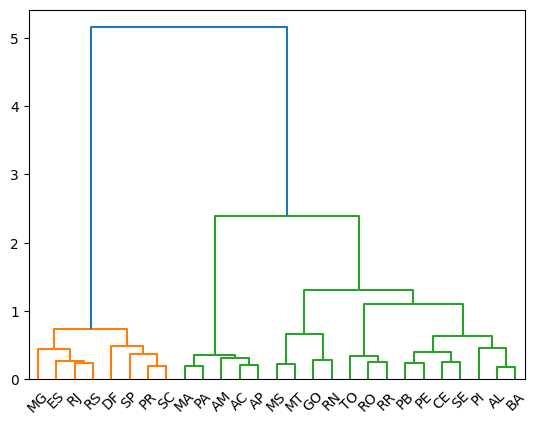

In [17]:
#Gerar dendograma da clusterização
dendrogram(clustering, show_leaf_counts=True, labels=df_normal.index)

In [18]:
#Obter 3 clusters
clusters = fcluster(clustering, 2, criterion='distance')
clusters

array([2, 3, 2, 2, 3, 3, 1, 1, 3, 2, 1, 3, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3,
       1, 1, 3, 1, 3], dtype=int32)

In [19]:
#Atualizar dataframe com os clusters identificados
df_estados['cluster'] = clusters

In [20]:
df_estados

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,FX_RENDA,media_notas,Com internet,cluster
SG_UF_PROVA,,,,,,,,,
AC,464.556383,479.882979,500.413054,472.981003,528.832764,1874.851103,488.685048,0.579584,2
AL,471.745456,486.785419,504.140816,492.616995,559.409982,2019.012183,502.100996,0.807835,3
AM,467.134924,489.580935,490.895524,481.989528,523.096123,1883.962652,489.650893,0.633134,2
AP,462.157798,478.906109,492.680462,467.326347,523.942186,1969.966215,484.194573,0.620993,2
BA,476.515413,493.029870,509.719551,493.834493,557.650400,1950.836662,505.399159,0.820359,3
CE,481.004567,499.561649,513.071725,513.536260,571.483836,1906.930480,514.176729,0.754641,3
DF,503.346955,526.784230,538.897345,534.268430,578.739849,4375.563616,535.106995,0.876374,1
ES,505.035137,524.550688,531.982386,540.386237,586.289680,3012.299132,536.286760,0.899164,1
GO,491.068757,509.409563,523.521483,517.611197,578.650589,2850.987715,522.860666,0.878230,3


In [21]:
#Renomear colunas para gerar gráficos
df_estados.rename(columns={'NU_NOTA_CN': 'Nota Ciências da Natureza', 
                           'NU_NOTA_CH': 'Nota Ciências Humanas', 
                           'NU_NOTA_LC': 'Nota Linguagens e Códigos', 
                           'NU_NOTA_MT': 'Nota Matemática', 
                           'NU_NOTA_REDACAO': 'Nota Redação', 
                           'FX_RENDA': 'Faixa de Renda', 
                           'media_notas': 'Nota Enem', 
                           'Com internet': 'Proporção com internet',
                          }, inplace=True)

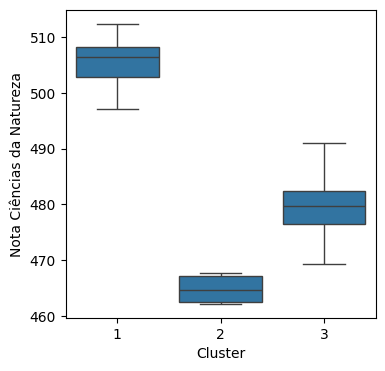

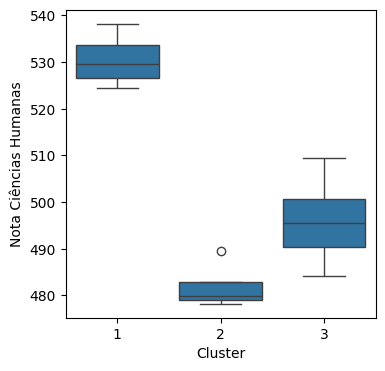

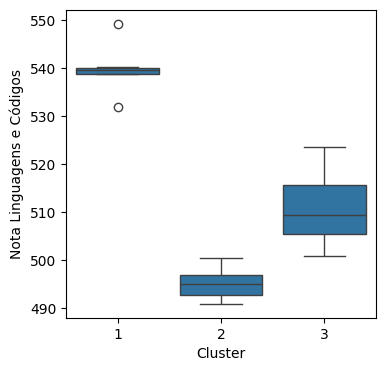

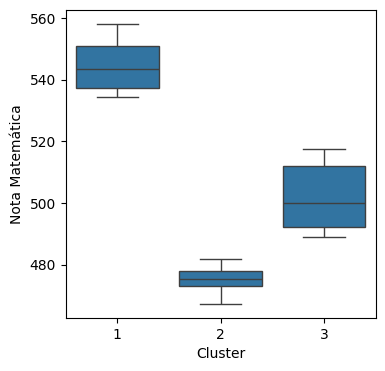

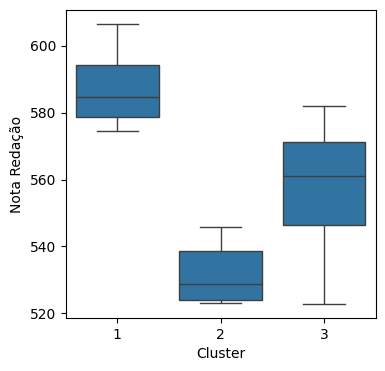

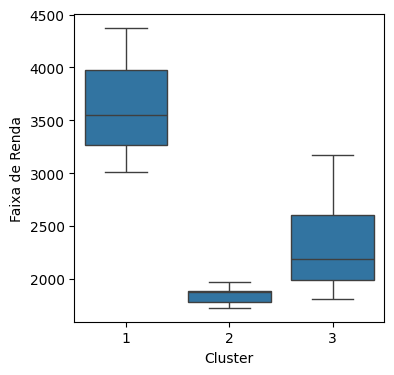

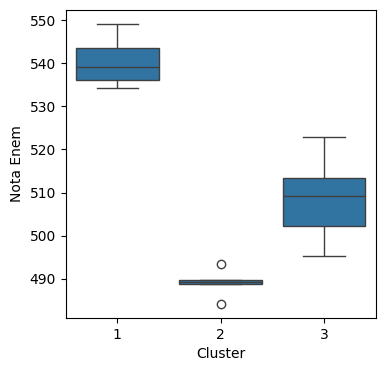

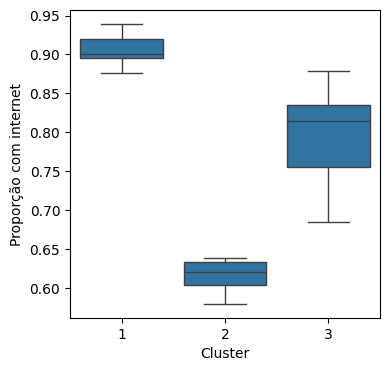

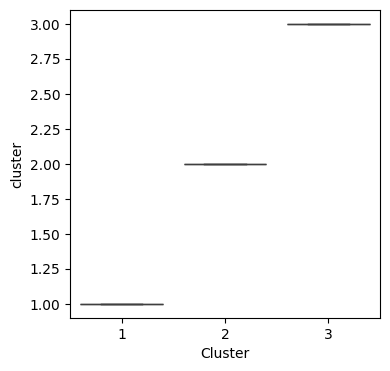

In [22]:
#Plotar a distribuição dos valores agregados de cada variável para entender os clusters
for col in df_estados:
    plt.figure(figsize=(4, 4))
    sns.boxplot(x='cluster', y=col, data=df_estados)
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.show()